In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [4]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df = df.iloc[:,1:]

In [7]:
df.head

<bound method NDFrame.head of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()

In [10]:
df['Species'] = encoder.fit_transform(df['Species'])

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [13]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

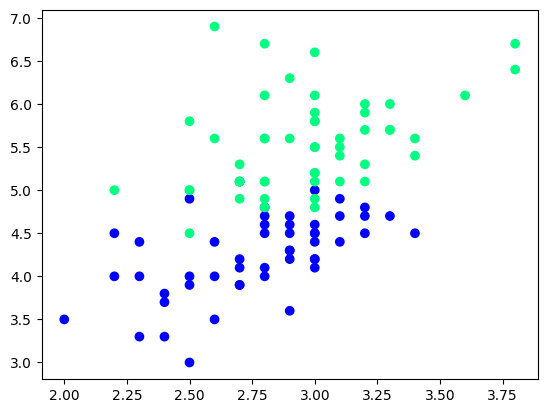

In [15]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [16]:
# Taking only 10 rows for training
# Shuffling the dataset
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [17]:
df_train

,SepalWidthCm,PetalLengthCm,Species
103,2.9,5.6,2
92,2.6,4.0,1
51,3.2,4.5,1
89,2.5,4.0,1
62,2.2,4.0,1
96,2.9,4.2,1
71,2.8,4.0,1
114,2.8,5.1,2
108,2.5,5.8,2
130,2.8,6.1,2


In [18]:
df_val

,SepalWidthCm,PetalLengthCm,Species
65,3.1,4.4,1
112,3.0,5.5,2
135,3.0,6.1,2
63,2.9,4.7,1
52,3.1,4.9,1


In [19]:
x_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [20]:
x_test

array([[3.1, 4.4],
       [3. , 5.5],
       [3. , 6.1],
       [2.9, 4.7],
       [3.1, 4.9]])

## Case 1 - Bagging

In [21]:
# Data for tree 1
df_bag = df_train.sample(8,replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
71,2.8,4.0,1
103,2.9,5.6,2
92,2.6,4.0,1
96,2.9,4.2,1
92,2.6,4.0,1
108,2.5,5.8,2
62,2.2,4.0,1
108,2.5,5.8,2


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [23]:
df_bag1 = DecisionTreeClassifier()

In [24]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values, clf=clf,legend=2)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test,y_pred))

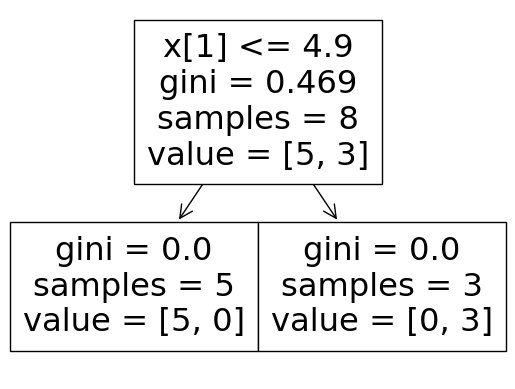

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


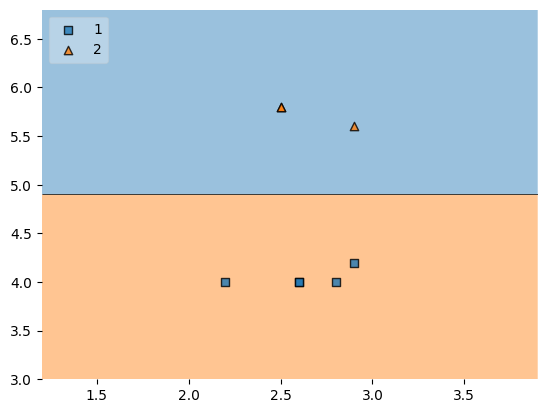

In [25]:
evaluate(df_bag1,X,y)

In [26]:
# Data for tree 2
df_bag = df_train.sample(8,replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
114,2.8,5.1,2
108,2.5,5.8,2
62,2.2,4.0,1
103,2.9,5.6,2
108,2.5,5.8,2
62,2.2,4.0,1
89,2.5,4.0,1
71,2.8,4.0,1


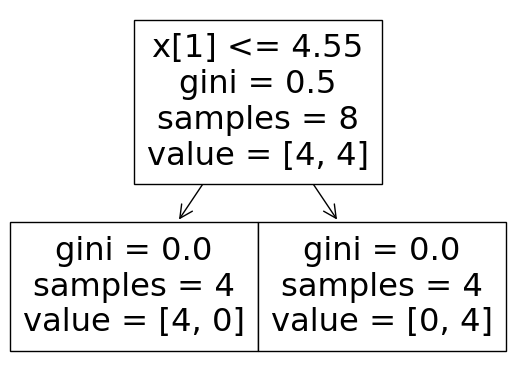

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


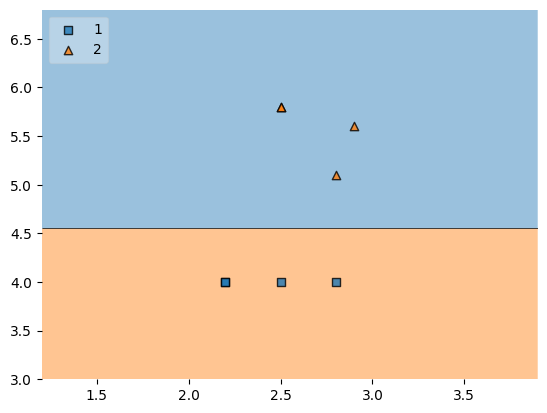

In [27]:
df_bag2 = DecisionTreeClassifier()
evaluate(df_bag2,X,y)

In [28]:
# Data for tree 3
df_bag = df_train.sample(8,replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
71,2.8,4.0,1
62,2.2,4.0,1
130,2.8,6.1,2
71,2.8,4.0,1
89,2.5,4.0,1
51,3.2,4.5,1
51,3.2,4.5,1
96,2.9,4.2,1


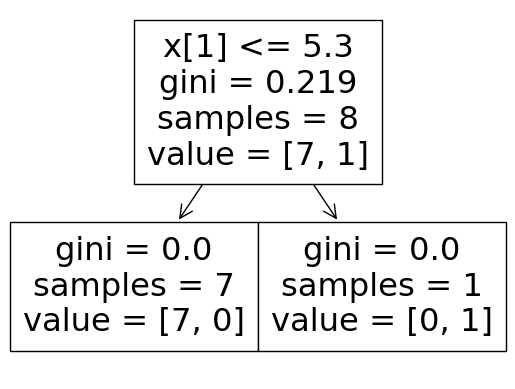

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


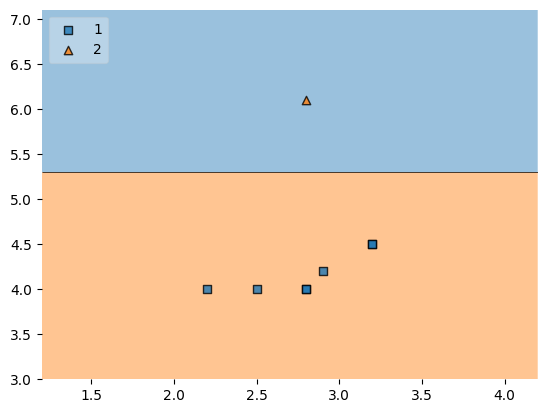

In [29]:
df_bag3 = DecisionTreeClassifier()
evaluate(df_bag3,X,y)

## Predict

In [30]:
df_test

,SepalWidthCm,PetalLengthCm,Species
102,3.0,5.9,2
145,3.0,5.2,2
132,2.8,5.6,2
95,3.0,4.2,1
88,3.0,4.1,1


In [32]:
print("Predictor 1",df_bag1.predict(np.array([2.9,4.6]).reshape(1,2)))
print("Predictor 2",df_bag2.predict(np.array([2.9,4.6]).reshape(1,2)))
print("Predictor 3",df_bag3.predict(np.array([2.9,4.6]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [1]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Pasting

In [33]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
103,2.9,5.6,2
92,2.6,4.0,1
51,3.2,4.5,1
89,2.5,4.0,1
62,2.2,4.0,1
96,2.9,4.2,1
71,2.8,4.0,1
114,2.8,5.1,2
108,2.5,5.8,2
130,2.8,6.1,2


In [34]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
71,2.8,4.0,1
108,2.5,5.8,2
62,2.2,4.0,1
114,2.8,5.1,2
89,2.5,4.0,1
51,3.2,4.5,1
96,2.9,4.2,1
103,2.9,5.6,2


## Random Subspaces

In [35]:
df1 = pd.read_csv('/kaggle/input/iris/Iris.csv')
df1 = df1.sample(10)

In [36]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
37,38,4.9,3.1,1.5,0.1,Iris-setosa
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
118,119,7.7,2.6,6.9,2.3,Iris-virginica
23,24,5.1,3.3,1.7,0.5,Iris-setosa
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
145,146,6.7,3.0,5.2,2.3,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica
68,69,6.2,2.2,4.5,1.5,Iris-versicolor


In [37]:
# Here we do column sampling instead of row
df1.sample(2,replace=True,axis=1) # here replacement is done

,SepalLengthCm,SepalLengthCm
37,4.9,4.9
55,5.7,5.7
118,7.7,7.7
23,5.1,5.1
62,6.0,6.0
67,5.8,5.8
76,6.8,6.8
145,6.7,6.7
135,7.7,7.7
68,6.2,6.2


## Random Patches

In [38]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
37,38,4.9,3.1,1.5,0.1,Iris-setosa
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
118,119,7.7,2.6,6.9,2.3,Iris-virginica
23,24,5.1,3.3,1.7,0.5,Iris-setosa
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
145,146,6.7,3.0,5.2,2.3,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica
68,69,6.2,2.2,4.5,1.5,Iris-versicolor


In [39]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,PetalWidthCm,Id
118,2.3,119
135,2.3,136
62,1.0,63
37,0.1,38
76,1.4,77
135,2.3,136
145,2.3,146
67,1.0,68
